In [1]:
from picamera.array import PiYUVArray, PiRGBArray
from picamera import PiCamera
from scipy.signal import find_peaks, butter, filtfilt
import time
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np

camera = PiCamera()

# Initialize the buffer and start capturing
rawCapture = PiRGBArray(camera)
stream = camera.capture_continuous(rawCapture, format="rgb", use_video_port=True)
rawCapture.truncate(0)
frame = next(stream)

I = ski.color.rgb2gray(frame.array)

plt.imshow(I, cmap="gray")

# Release resources
stream.close()
rawCapture.close()
camera.close()

In [2]:
# Release resources
stream.close()
rawCapture.close()
camera.close()

In [21]:
# Release resources
stream.close()
rawCapture.close()
camera.close()

# To filter the noise in the image we use a 3rd order Butterworth filter
# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.007)

# Run a track detection algorithm on a single horizontal line.
# Uses YUV420 image format as the Y component corresponds to image intensity (gray image)
# and thus there is no need to convert from RGB to BW
camera = PiCamera()

# Initialize the buffer and start capturing
print("Taking raw capture")
rawCapture = PiYUVArray(camera)
stream = camera.capture_continuous(rawCapture, format="yuv", use_video_port=True)

# Measure the time needed to process 300 images to estimate the FPS
N = 1
k = 0
t = time.time()
mid = 500

for f in stream:
    I = f.array[:, :, 0]
    rawCapture.truncate(0)
    
    width = int(I.shape[0])
    L = I[int(width*0.7): int(width*0.8), :].mean(axis=0)
    Lf = filtfilt(b, a, L)

    p = find_peaks(Lf, height=0.6)
    
    k += 1
    if k > N:
        break


time_elapsed = time.time() - t
print("Elapsed {:0.2f} seconds, estimated FPS {:0.2f}".format(time_elapsed, N / time_elapsed))

# Release resources
stream.close()
rawCapture.close()
camera.close()
print("done")
# Show the last image
plt.imshow(I)

PiCameraMMALError: Failed to enable connection: Out of resources

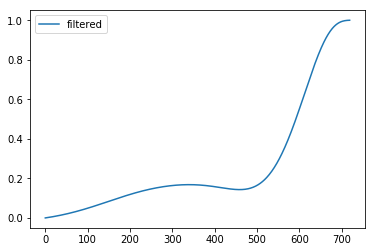

In [19]:
# normalize LF
max_Lf = max(Lf)
min_Lf = min(Lf)
Lf = [(val - min_Lf)/(max_Lf - min_Lf) for val in Lf]

# Plot the pixel intensities along the selected line
# plt.plot(L, label="raw")
plt.plot(Lf, label="filtered")
# plt.ylim([0, 300])
plt.legend()

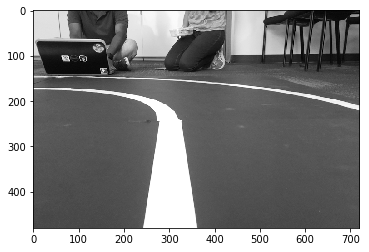

In [7]:
plt.imshow(I[:500, :], cmap="gray")

In [ ]:
p[0]

In [9]:
# Try to move towards the middle peak. Or atleast follow a peak.
# Pick the middle peak

p[0][int(len(p[0])/2)]

350

In [10]:
# Release resources
stream.close()
rawCapture.close()
camera.close()

b, a = butter(3, 0.02)

# Run a track detection algorithm on a single horizontal line.
# Uses YUV420 image format as the Y component corresponds to image intensity (gray image)
# and thus there is no need to convert from RGB to BW
camera = PiCamera()
camera.sensor_mode = 7
camera.resolution = res
camera.framerate = 120

print("Taking raw capture")
rawCapture = PiYUVArray(camera, size=res)
stream = camera.capture_continuous(rawCapture, format="yuv", use_video_port=True)

mid = 500
for f in stream:
        # Get the intensity component of the image (a trick to get black and white images)
    I = f.array[:, :, 0]
    # Reset the buffer for the next image
    rawCapture.truncate(0)
    # Select a horizontal line in the middle of the image
    L = I[120, :]
    # Smooth the transitions so we can detect the peaks 
    Lf = filtfilt(b, a, L)

    # Find peaks which are higher than 0.5
    p = find_peaks(Lf, height=0.5)
    print("Peak Positions: ", p)
    if len(p[0]) > 0:
        peak_Position = p[0][int(len(p)/2)]
        disp = mid - peak_Position
    else:
        disp = 0
    print("displacement: ", disp)
    if disp < -300:
        print("go right")
    elif -300 <= disp <= 300:
        print("go straight")
    else:
        print("go left")

NameError: name 'res' is not defined

In [ ]:
stream.close()
rawCapture.close()
camera.close()